1. Ni Luh Putu Yonita Putri Utami (2105551066)
2. Desak Gede Inten PUrnawati (2105551069)
3. Ni Putu Triska Widiantari (2105551087)

**Keterangan Kolom**

**id** : Kolom ini berisi nomor identifikasi unik untuk setiap pasien.

**diagnosis** : Kolom ini berisi hasil diagnosis kanker payudara, di mana "M" menunjukkan malignan (ganas) dan "B" menunjukkan benign (jinak).

**radius_mean** : Rata-rata dari jari-jari inti sel tumor.

**texture_mean** : Rata-rata dari variasi dalam intensitas tekstur gambar sel tumor.

**perimeter_mean** : Rata-rata dari panjang perimeter sel tumor.

**area_mean** : Rata-rata dari area inti sel tumor.

**smoothness_mean** : Rata-rata dari variasi lokal dalam panjang perimeter sel tumor.

**compactness_mean** : Rata-rata dari rasio perimeter^2 / area - 1.0.

**concavity_mean** : Rata-rata dari keparahan dari bagian cekung pada kontur sel tumor.

**concave_points_mean** : Rata-rata dari jumlah titik cekung pada kontur sel tumor.

**symmetry_mean** : Rata-rata dari simetri sel tumor.

**fractal_dimension_mean** : Rata-rata dari "fractal dimension" (1 - "box counting dimension") dari kontur sel tumor.

**radius_se** : Standar error dari jari-jari inti sel tumor.

**texture_se** : Standar error dari variasi dalam intensitas tekstur gambar sel tumor.
**perimeter_se** : Standar error dari panjang perimeter sel tumor.

**area_se** : Standar error dari area inti sel tumor.

**smoothness_se** : Standar error dari variasi lokal dalam panjang perimeter sel tumor.

**compactness_se** : Standar error dari rasio perimeter^2 / area - 1.0.
**concavity_se**: Standar error dari keparahan dari bagian cekung pada kontur sel tumor.

**concave_points_se** : Standar error dari jumlah titik cekung pada kontur sel tumor.

**symmetry_se** : Standar error dari simetri sel tumor.

**fractal_dimension_se** : Standar error dari "fractal dimension" (1 - "box counting dimension") dari kontur sel tumor.

**radius_worst** : Nilai terburuk (terbesar) dari jari-jari inti sel tumor.

**texture_worst** : Nilai terburuk (terbesar) dari variasi dalam intensitas tekstur gambar sel tumor.

**perimeter_worst** : Nilai terburuk (terbesar) dari panjang perimeter sel tumor.
**area_worst** : Nilai terburuk (terbesar) dari area inti sel tumor.

**smoothness_worst** : Nilai terburuk (terbesar) dari variasi lokal dalam panjang perimeter sel tumor.

**compactness_worst** : Nilai terburuk (terbesar) dari rasio perimeter^2 / area - 1.0.

**concavity_worst** : Nilai terburuk (terbesar) dari keparahan dari bagian cekung pada kontur sel tumor.

concave points_worst : Nilai terburuk (terbesar) dari jumlah titik cekung pada kontur sel tumor.

**symmetry_worst** : Nilai terburuk (terbesar) dari simetri sel tumor.

**fractal_dimension_worst** : Nilai terburuk (terbesar) dari "fractal dimension" (1 - "box counting dimension") dari kontur sel tumor.

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown
from google.colab import files

from sklearn import decomposition
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DATA COLLECTING

In [ ]:
# Spesifikasi Nama Folder
folder_dataset = 'FDS'

# Membuat folder
os.makedirs(folder_dataset, exist_ok=True)

# Mengubah directory ke directory yang baru dibuat
os.chdir(folder_dataset)

# Menentukan id file dari Google Drive
file_id = '1Rr0lQ68DcskMTFdj_8WdsLGlvxUhFz4k'

# Menentukan nama output file
output_file = 'data.csv'

# Membuat URL untuk melakukan download file
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Melakukan download file dengan menggunakan gdown
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Rr0lQ68DcskMTFdj_8WdsLGlvxUhFz4k
To: /content/FDS/data.csv
100%|██████████| 125k/125k [00:00<00:00, 62.7MB/s]


'data.csv'

In [ ]:
# Read file excel ke dalam DataFrame
data = pd.read_csv(url)

In [ ]:
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [ ]:
data.shape

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# PREPROCESSING DATA

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
data['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True)

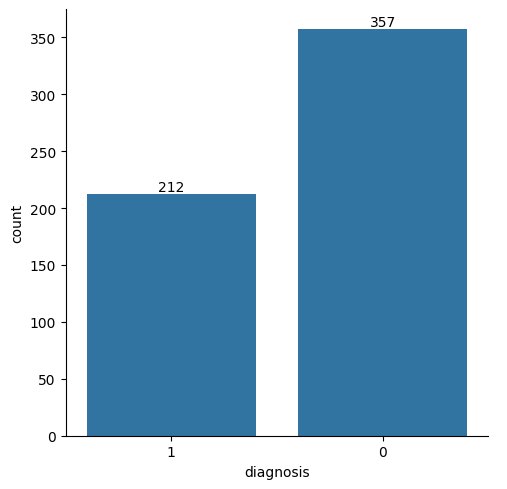

In [ ]:
# Plotting the count plot
plot = sns.catplot(x='diagnosis', data=data, kind='count')

# Calculating the counts
counts = data['diagnosis'].value_counts()

# Adding the counts on top of the bars
for ax in plot.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3,
                '%d' % int(height), ha="center")

# Show the plot
plt.show()

In [ ]:
# Menghapus kolom 'Unnamed: 32'
data.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
duplicates = data.duplicated(subset=data.columns.difference(['_id']), keep=False)
duplicate_rows = data[duplicates]

# Tampilkan baris duplikat
print(duplicate_rows)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [ ]:
data.sample(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
393    903516         1        21.61         22.28          144.40     1407.0   
10     845636         1        16.02         23.24          102.70      797.8   
56     857637         1        19.21         18.57          125.50     1152.0   
184    873885         1        15.28         22.41           98.92      710.6   
491  91376702         0        17.85         13.23          114.60      992.1   
120    865137         0        11.41         10.82           73.34      403.3   
275   8911164         0        11.89         17.36           76.20      435.6   
474    911391         0        10.88         15.62           70.41      358.9   
532  91903902         0        13.68         16.33           87.76      575.5   
566    926954         1        16.60         28.08          108.30      858.1   
106    863031         0        11.64         18.33           75.17      412.5   
328   8953902         1        16.27         20.71          106.90      813.7   
385     90291         1        14.60         23.29           93.97      664.7   
537    919812         0        11.69         24.44           76.37      406.4   
162    871201         1        19.59         18.15          130.70     1214.0   
480    912193         0        12.16         18.03           78.29      455.3   
230    881972         1        17.05         19.08          113.40      895.0   
447   9110944         0        14.80         17.66           95.88      674.8   
530     91858         0        11.75         17.56           75.89      422.9   
286   8912909         0        11.94         20.76           77.87      441.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
393          0.11670           0.20870         0.28100              0.15620   
10           0.08206           0.06669         0.03299              0.03323   
56           0.10530           0.12670         0.13230              0.08994   
184          0.09057           0.10520         0.05375              0.03263   
491          0.07838           0.06217         0.04445              0.04178   
120          0.09373           0.06685         0.03512              0.02623   
275          0.12250           0.07210         0.05929              0.07404   
474          0.10070           0.10690         0.05115              0.01571   
532          0.09277           0.07255         0.01752              0.01880   
566          0.08455           0.10230         0.09251              0.05302   
106          0.11420           0.10170         0.07070              0.03485   
328          0.11690           0.13190         0.14780              0.08488   
385          0.08682           0.06636         0.08390              0.05271   
537          0.12360           0.15520         0.04515              0.04531   
162          0.11200           0.16660         0.25080              0.12860   
480          0.09087           0.07838         0.02916              0.01527   
230          0.11410           0.15720         0.19100              0.10900   
447          0.09179           0.08890         0.04069              0.02260   
530          0.10730           0.09713         0.05282              0.04440   
286          0.08605           0.10110         0.06574              0.03791   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
393  ...         26.23          28.74           172.00      2081.0   
10   ...         19.19          33.88           123.80      1150.0   
56   ...         26.14          28.14           170.10      2145.0   
184  ...         17.80          28.03           113.80       973.1   
491  ...         19.82          18.42           127.10      1210.0   
120  ...         12.82          15.97            83.74       510.5   
275  ...         12.40          18.99            79.46       472.4   
474  ...         11.94          19.35            80.78       433.1   
532  ...         15

In [ ]:
data['diagnosis'] = data['diagnosis'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA

Import Library

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [ ]:
data.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.3

<Axes: >

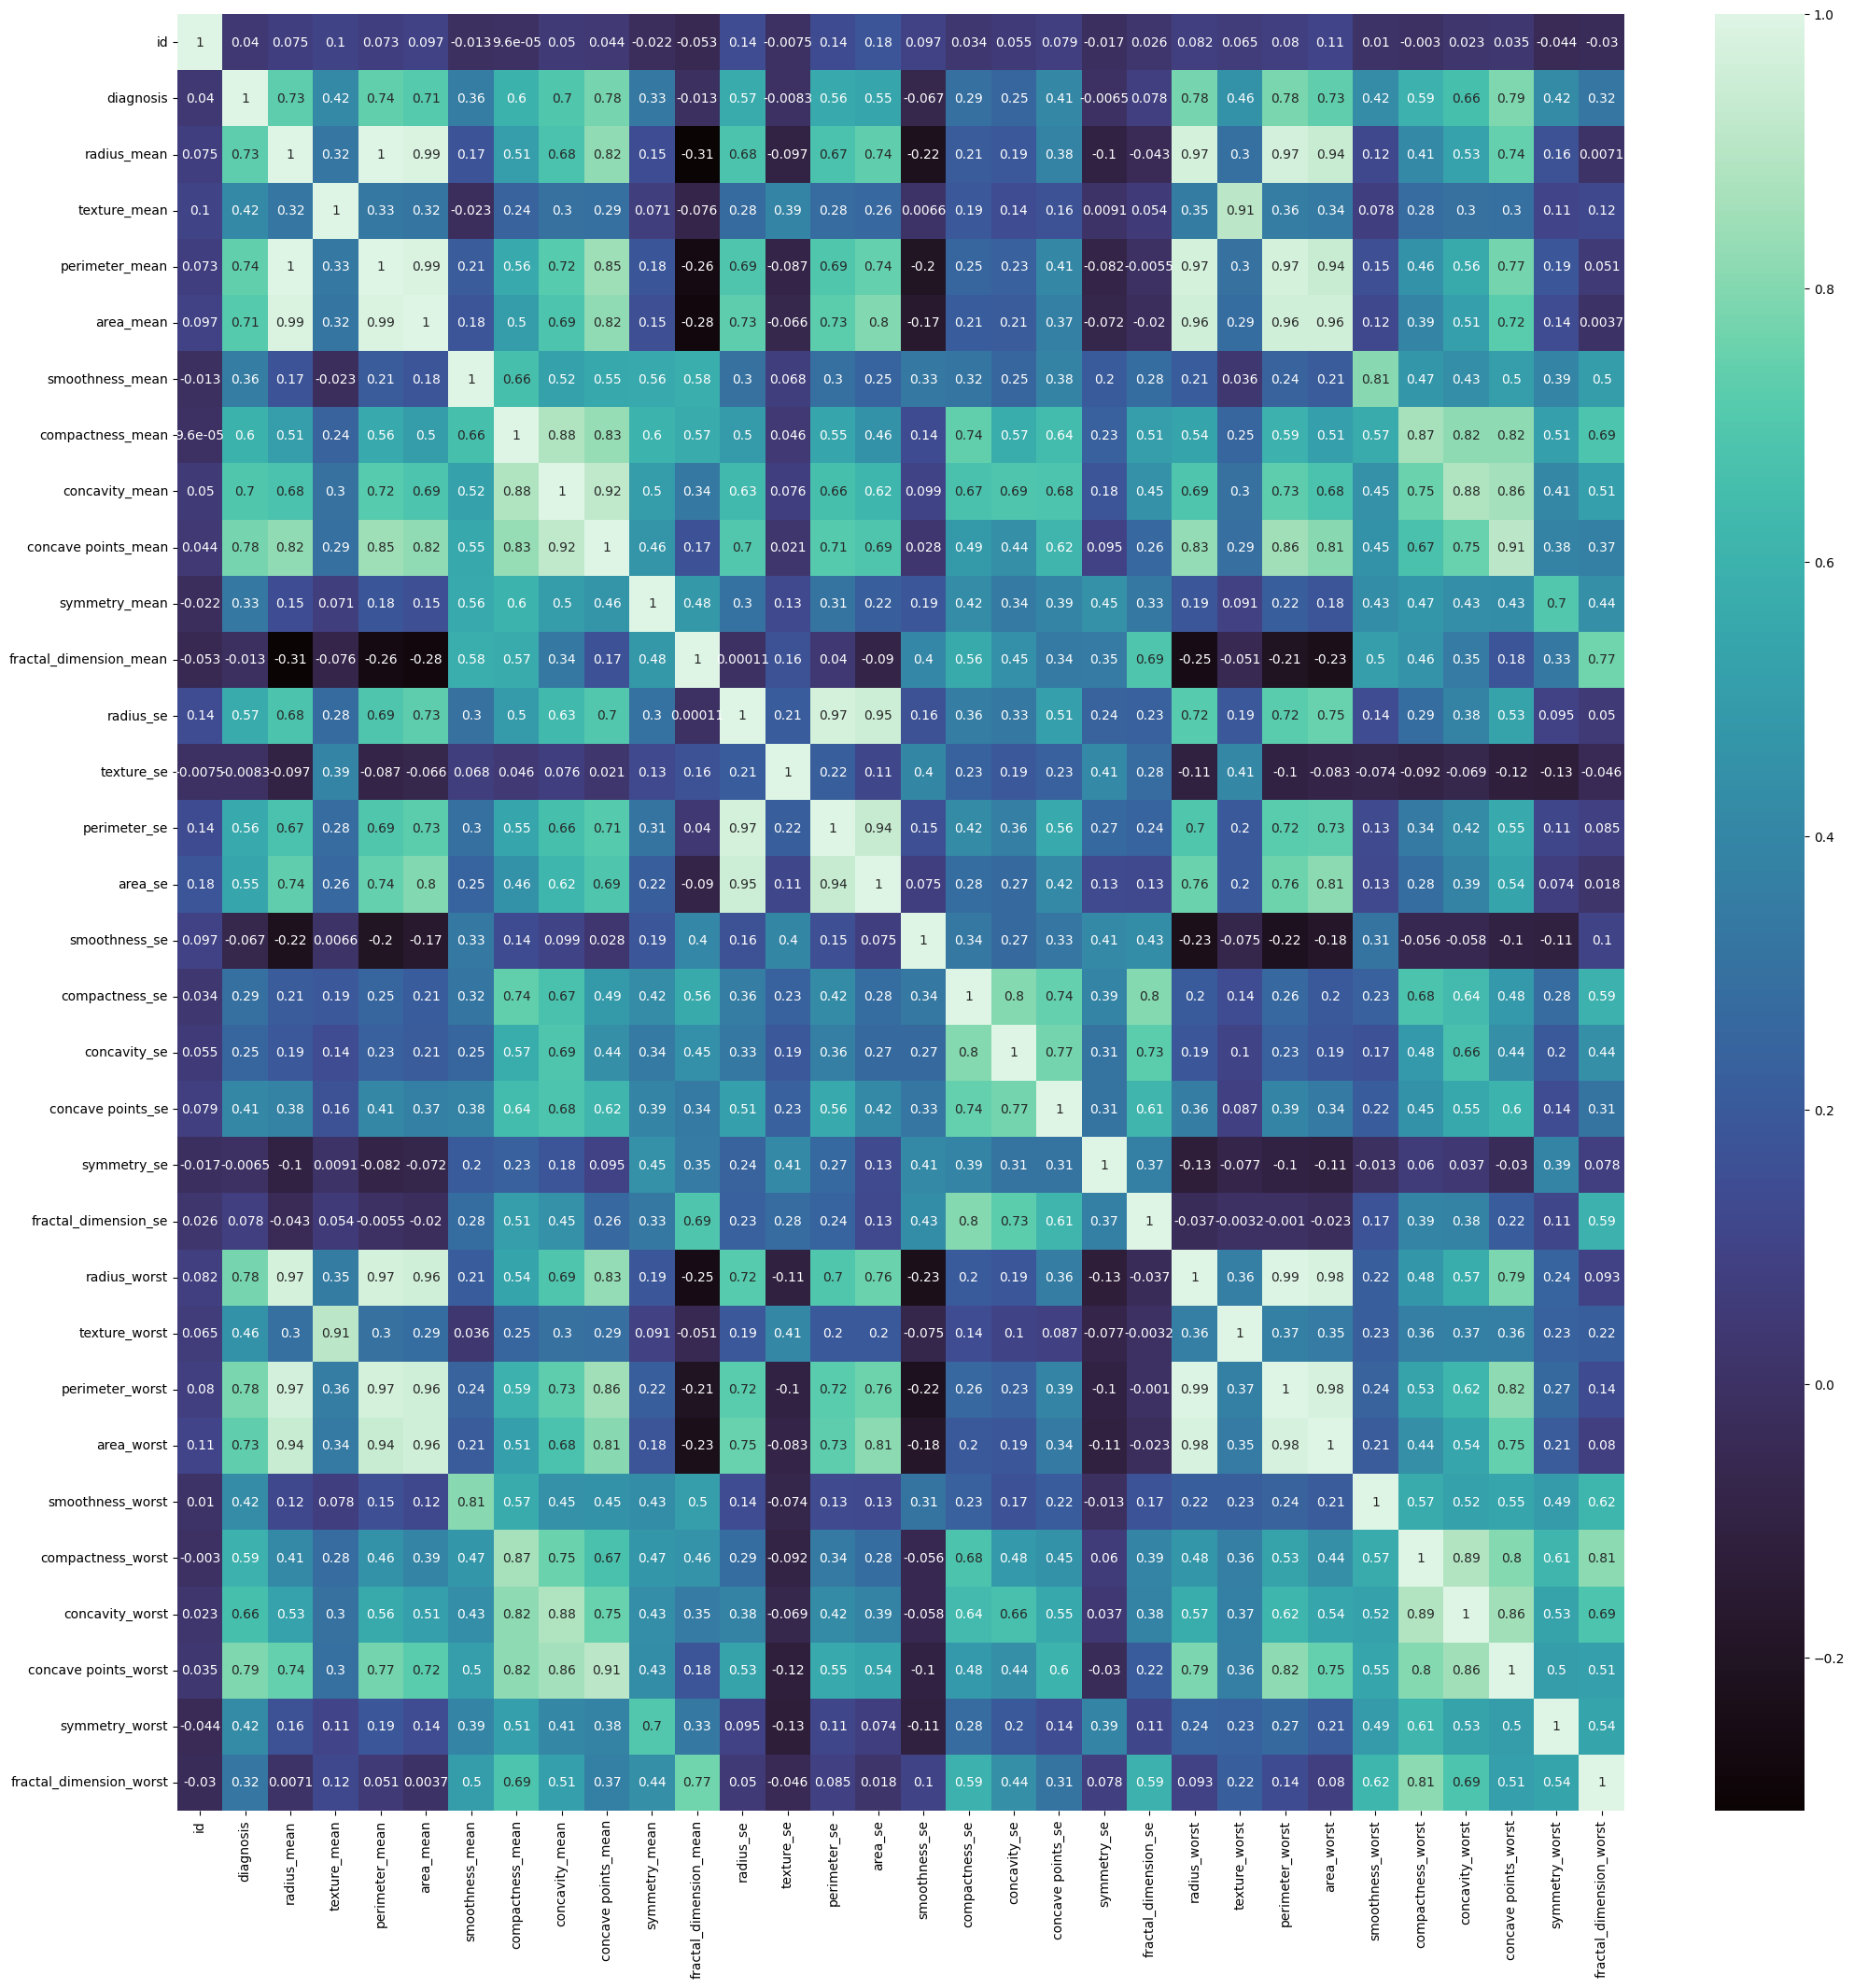

In [ ]:
correlation = data.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

<Figure size 1000x800 with 0 Axes>

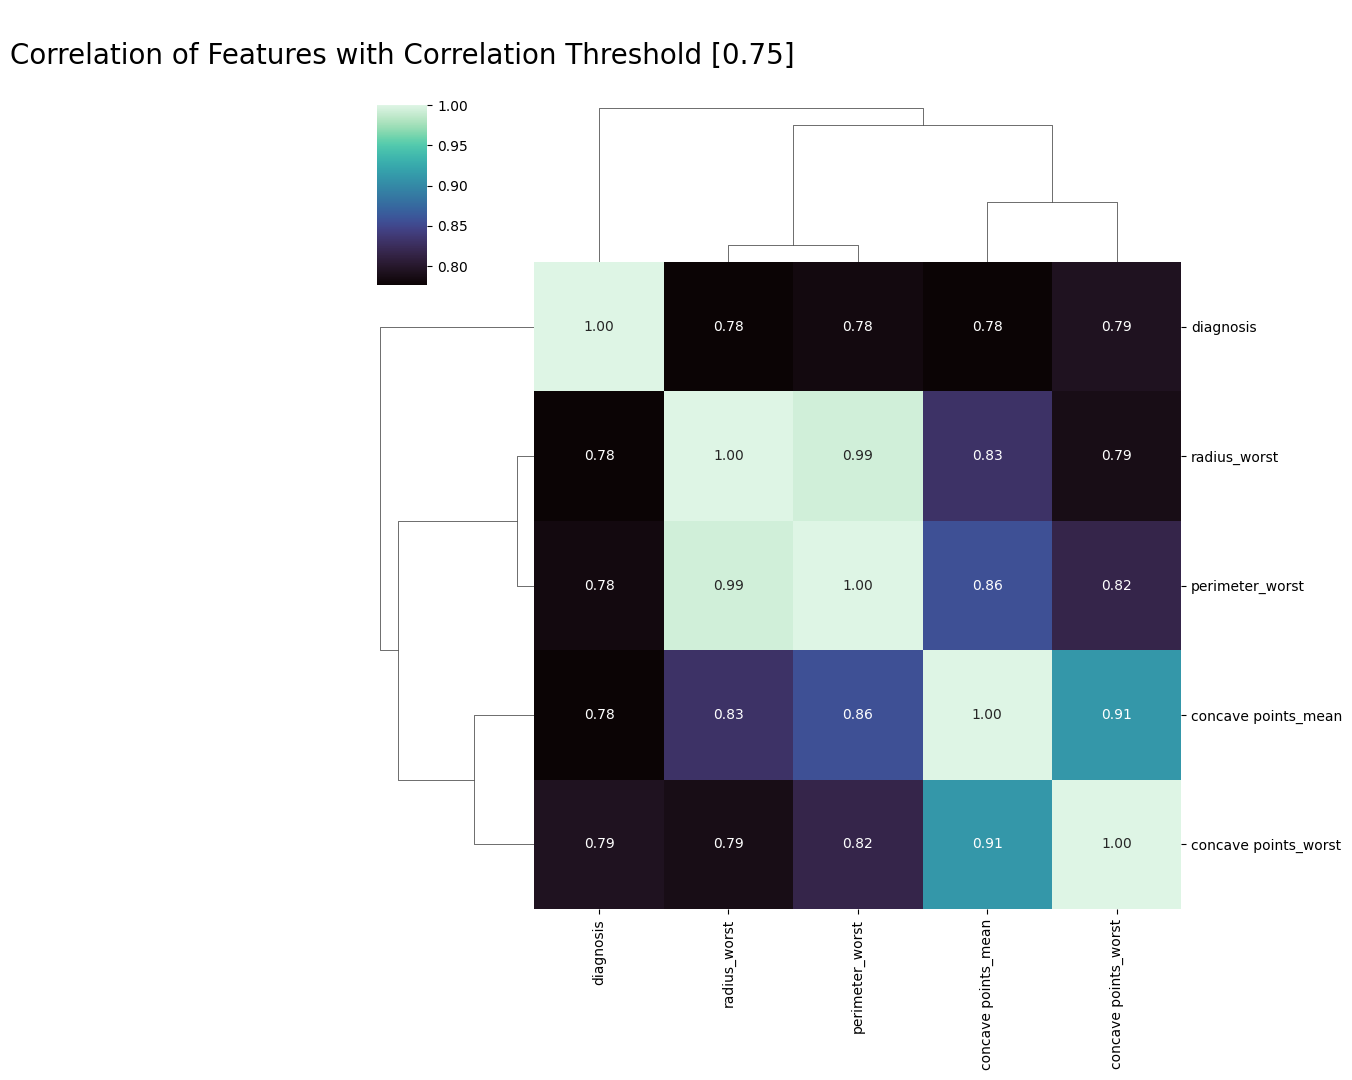

In [ ]:
# Menetapkan nilai threshold
threshold = 0.75

# Memfilter kolom yang memiliki korelasi absolut dengan 'diagnosis' lebih besar dari threshold
filter = np.abs(correlation["diagnosis"]) > threshold
correlation_features = correlation.columns[filter].tolist()

# Membuat figure dengan ukuran 10x8
plt.figure(figsize=(10, 8))

# Membuat clustermap dari fitur yang berkorelasi
sns.clustermap(data[correlation_features].corr(), annot=True, fmt=".2f", cmap='mako')

# Memberikan judul pada plot
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n", fontsize=20)

# Menampilkan plot
plt.show()


Terdapat hubungan linear positif yang kuat antara variabel malignancy dan radius of nuclear, number of concave points, perimeter and area. Hal ini terjadi karena fitur-fitur ini dimodelkan sedemikian rupa sehingga nilai yang lebih tinggi biasanya berkaitan dengan malignancy.

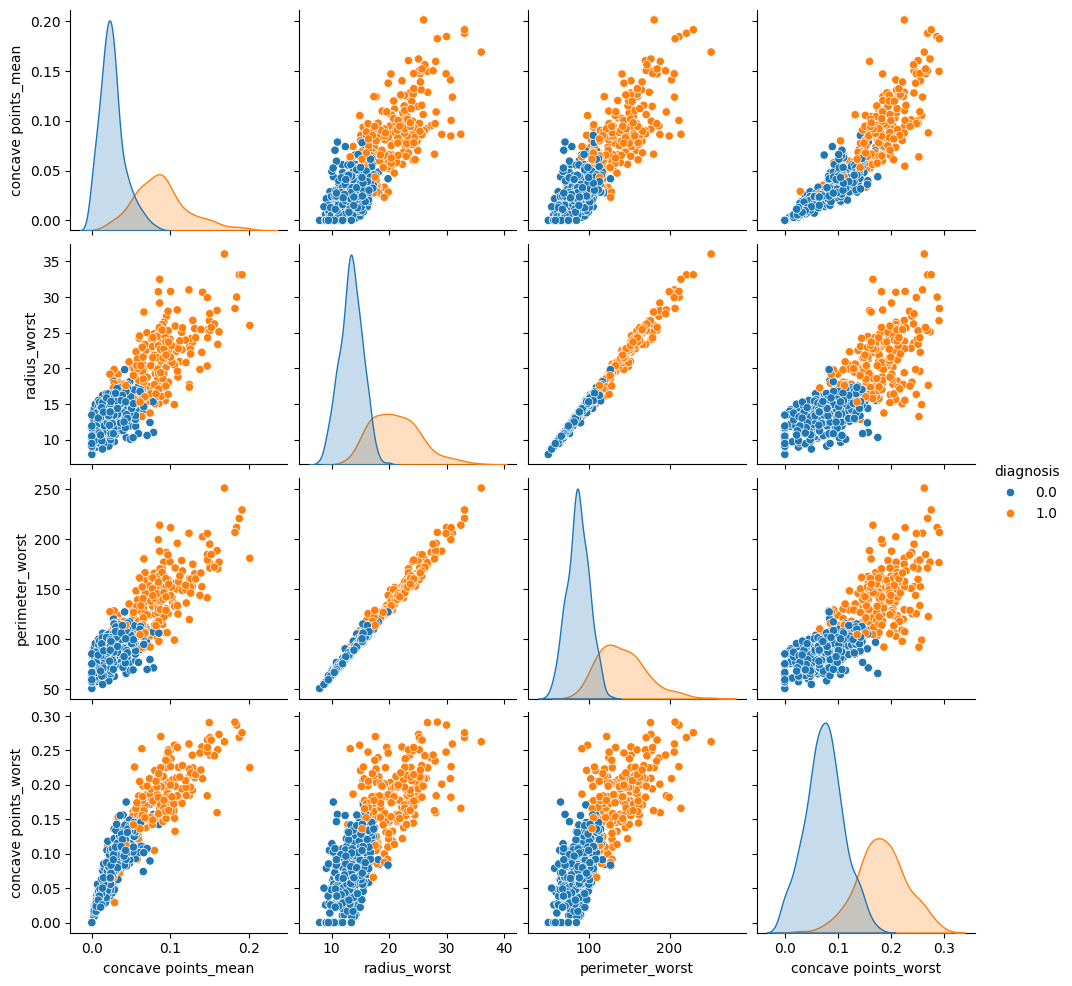

In [ ]:
sns.pairplot(data[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

In [ ]:
means = [col for col in data.columns if col.endswith('_mean')]
se = [col for col in data.columns if col.endswith('_se')]
worst = [col for col in data.columns if col.endswith('_worst')]

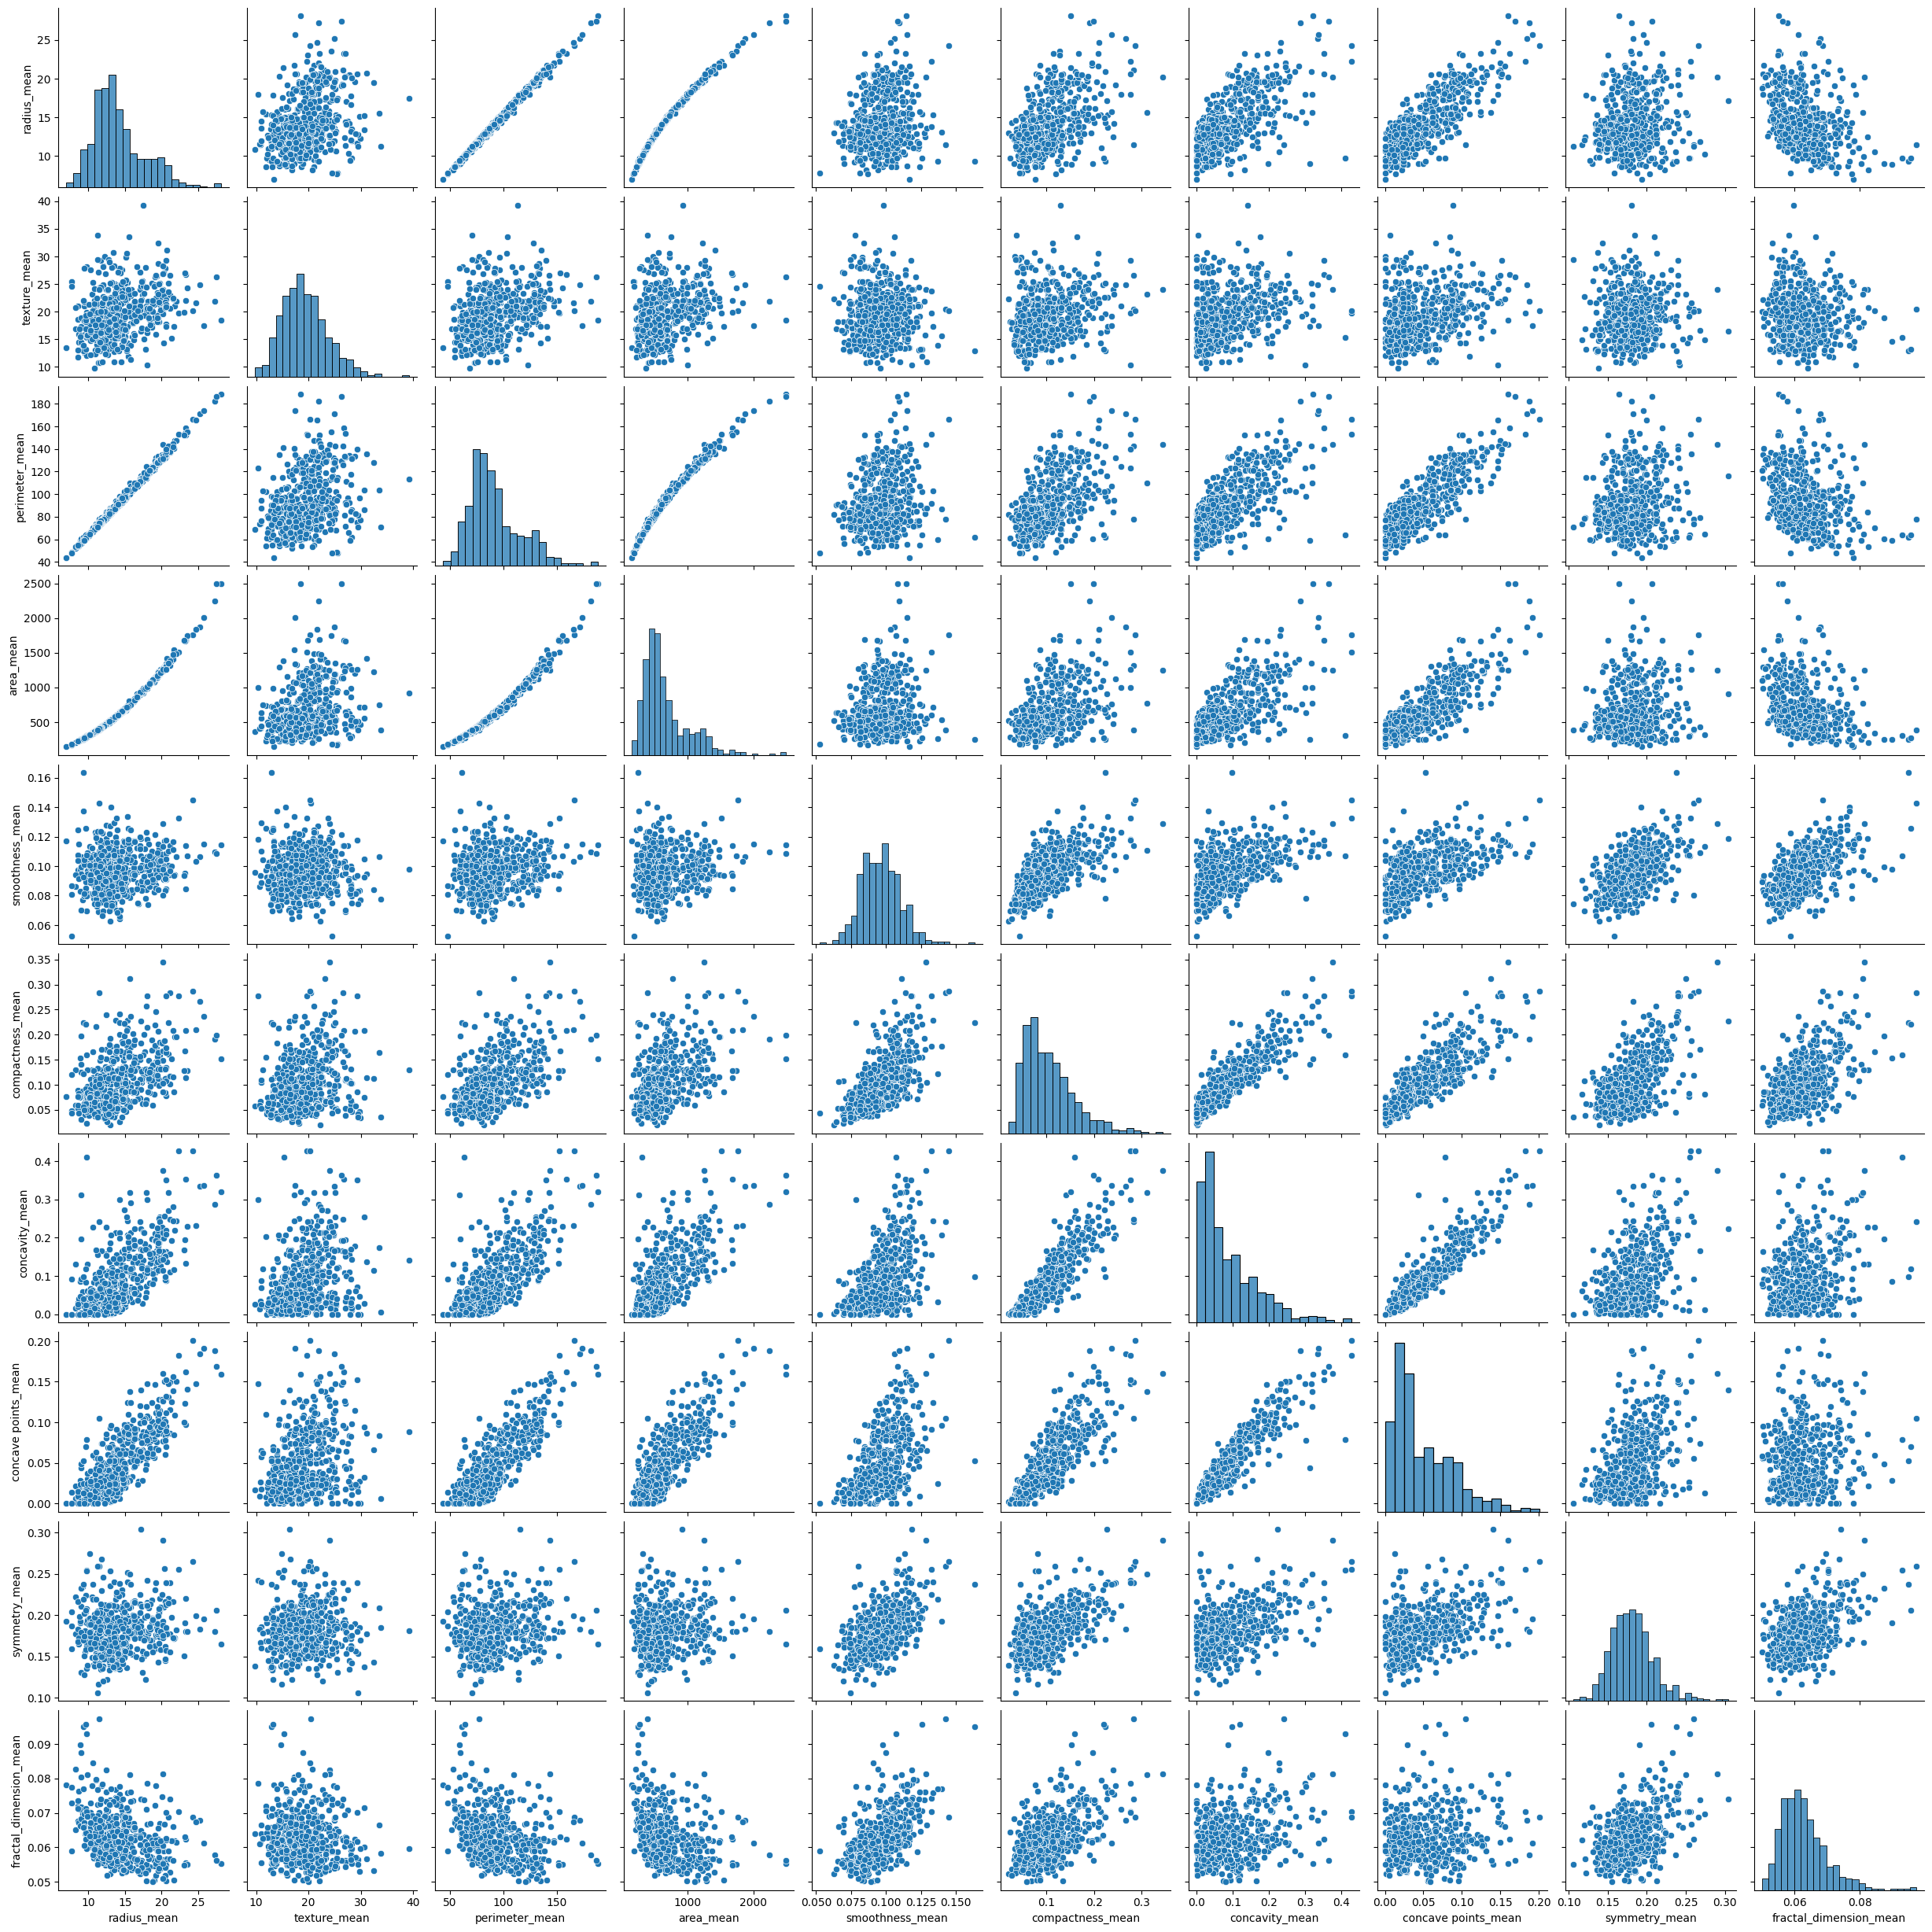

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[means]);

In [ ]:
# Membuat daftar kolom yang diakhiri dengan _mean
means = [col for col in data.columns if col.endswith('_mean')]

# Membuat daftar kolom yang diakhiri dengan _se
se = [col for col in data.columns if col.endswith('_se')]

# Membuat daftar kolom yang diakhiri dengan _worst
worst = [col for col in data.columns if col.endswith('_worst')]

In [ ]:
# Menghitung rata-rata dari kolom area_mean berdasarkan kolom diagnosis
data.groupby(['diagnosis'])['area_mean'].mean()

diagnosis
0.0    462.790196
1.0    978.376415
Name: area_mean, dtype: float64

Membuat Visualisasi menggunakan Violin Plot

In [ ]:
def plot_violinplot(data, feat_list):
    # Skala fitur
    scaler = StandardScaler()
    feat_scaled = pd.DataFrame(scaler.fit_transform(data[feat_list]), columns=feat_list, index=data.index)

    # Menggabungkan fitur yang telah diskalakan dengan diagnosis
    data_scaled = pd.concat([data['diagnosis'], feat_scaled], axis=1)

    # Melting dataframe untuk violinplot seaborn
    data_melt = pd.melt(frame=data_scaled, value_vars=feat_list, id_vars=['diagnosis'])

    # Membuat plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=200)
    sns.violinplot(x="variable", y="value", hue="diagnosis", data=data_melt, split=True, inner="quart", palette='Set2')

    # Menyesuaikan plot
    plt.title('Distribusi Ciri-Ciri Tumor Jinak dan Ganas')
    plt.xticks(rotation=45)

    # Menyesuaikan legenda
    L = plt.legend()
    L.get_texts()[0].set_text('Jinak')
    L.get_texts()[1].set_text('Ganas')

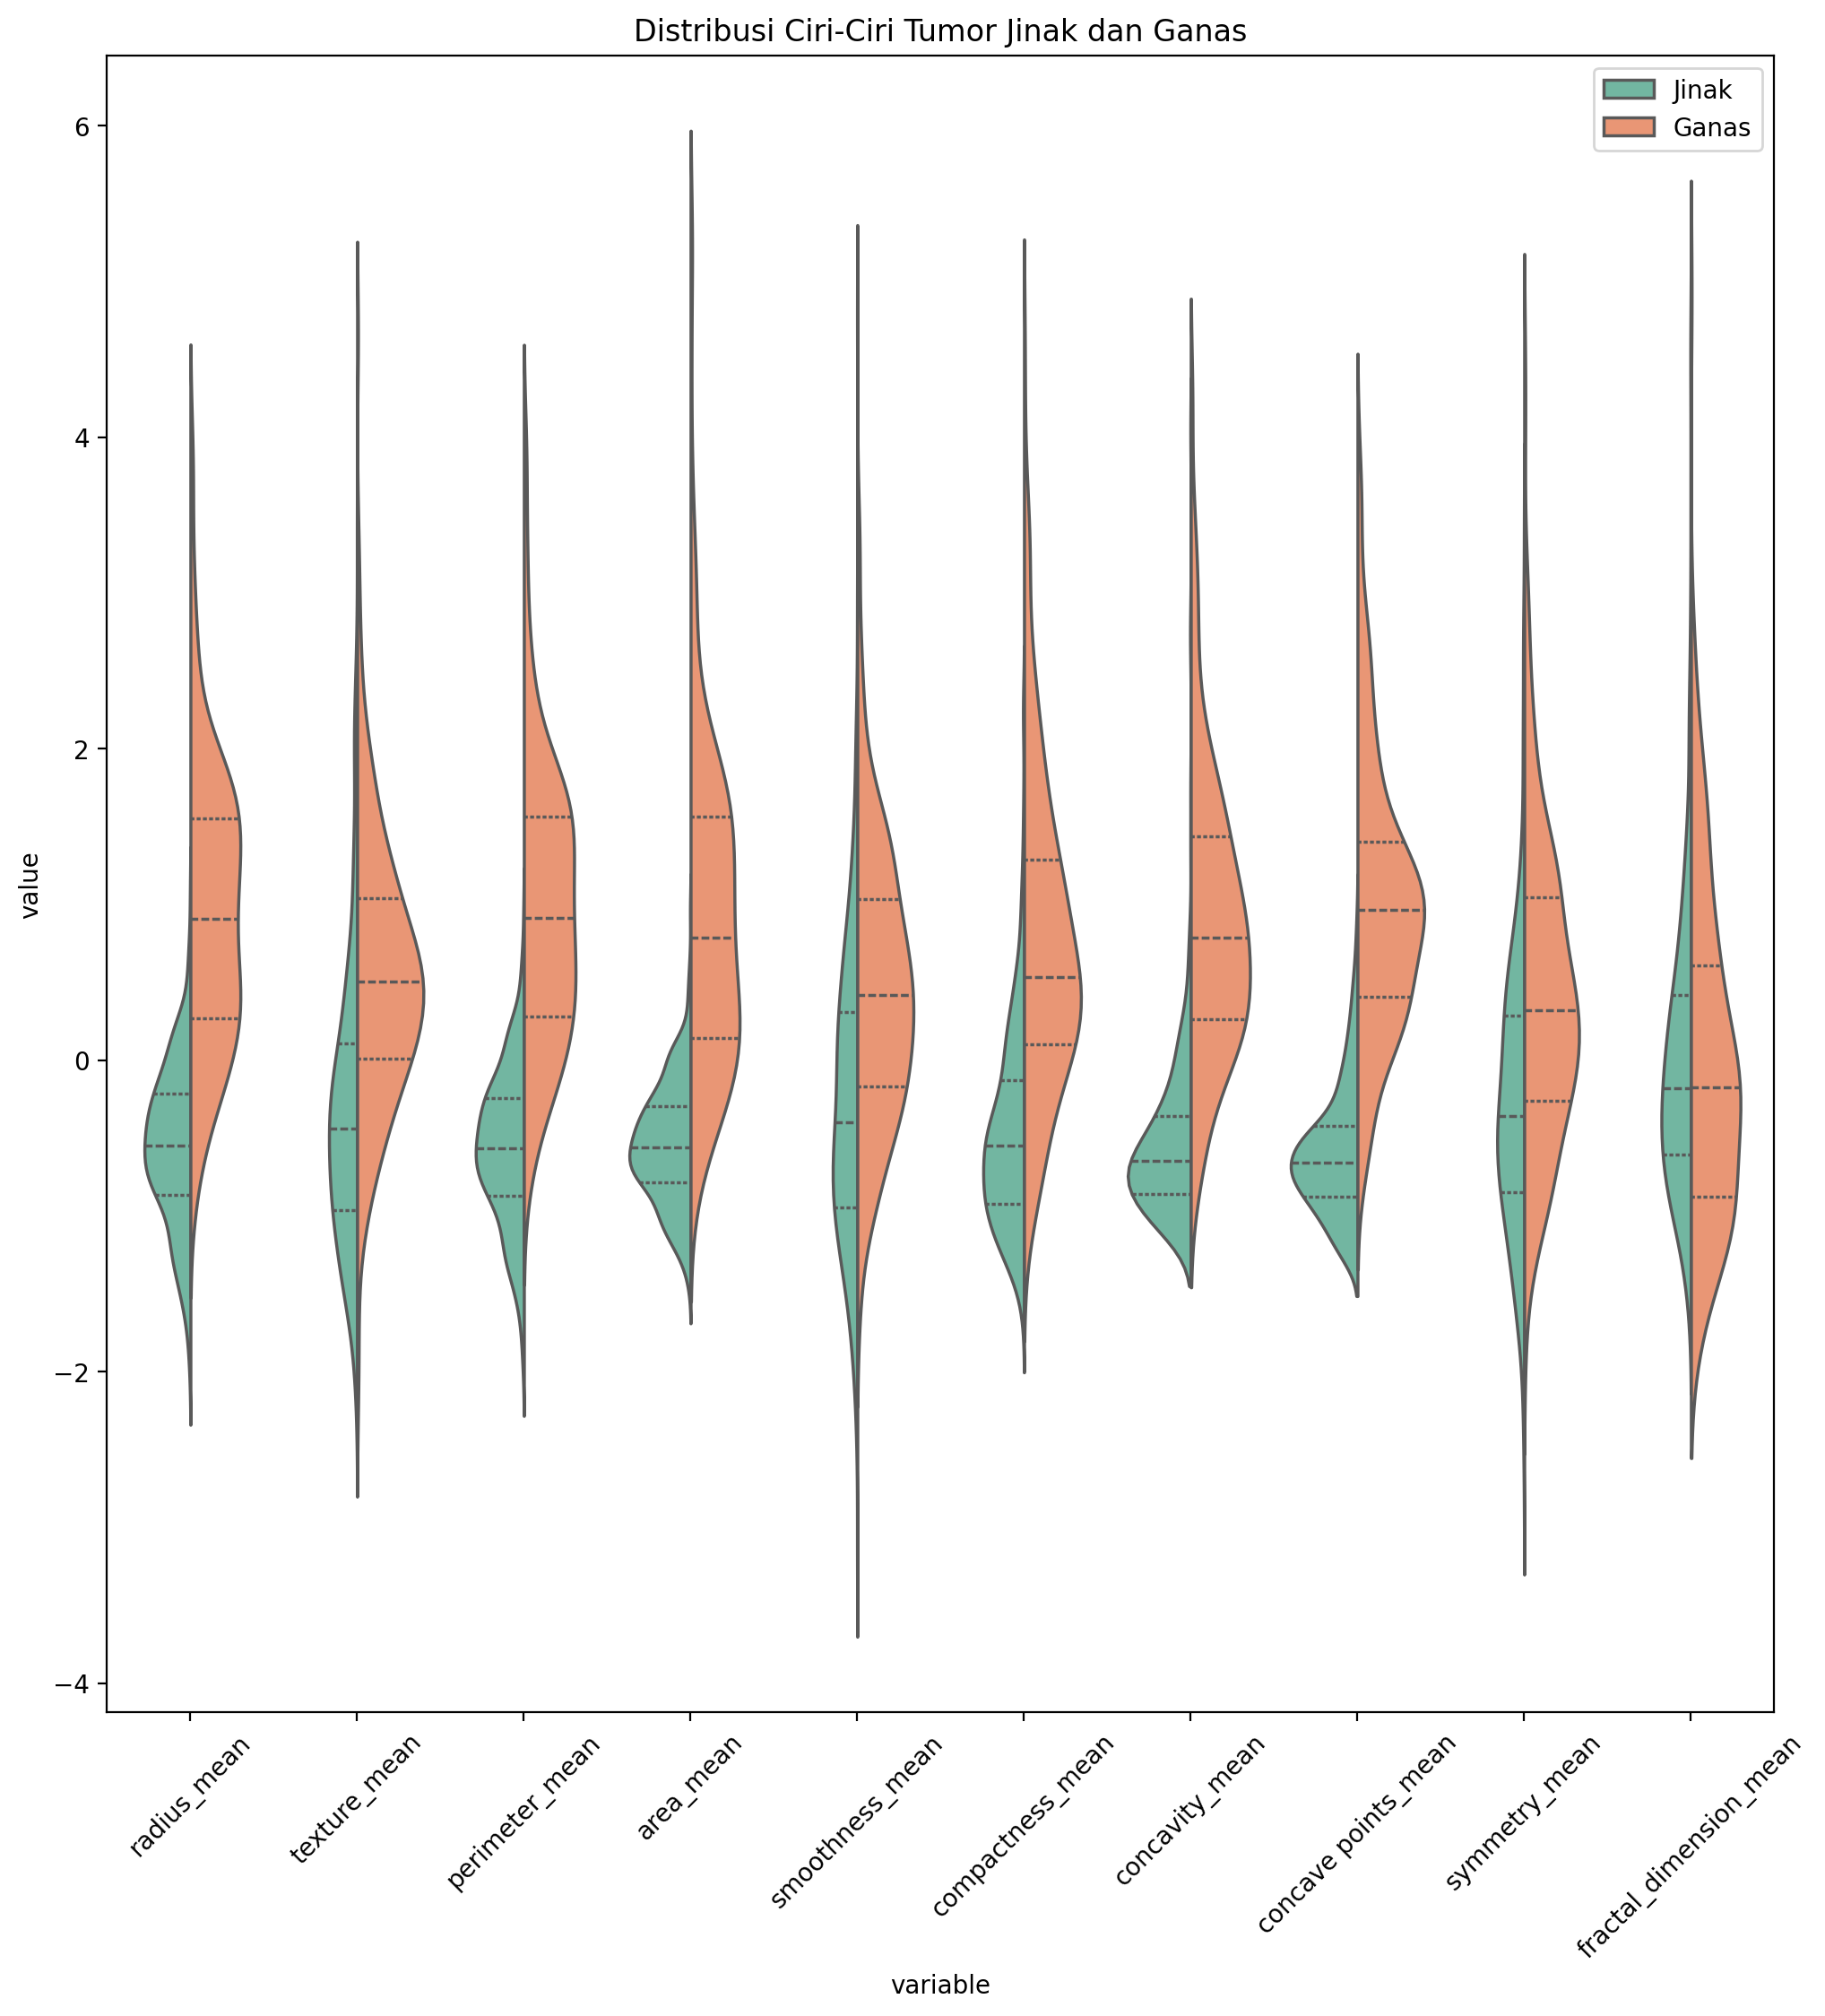

In [ ]:
plot_violinplot(data, means)

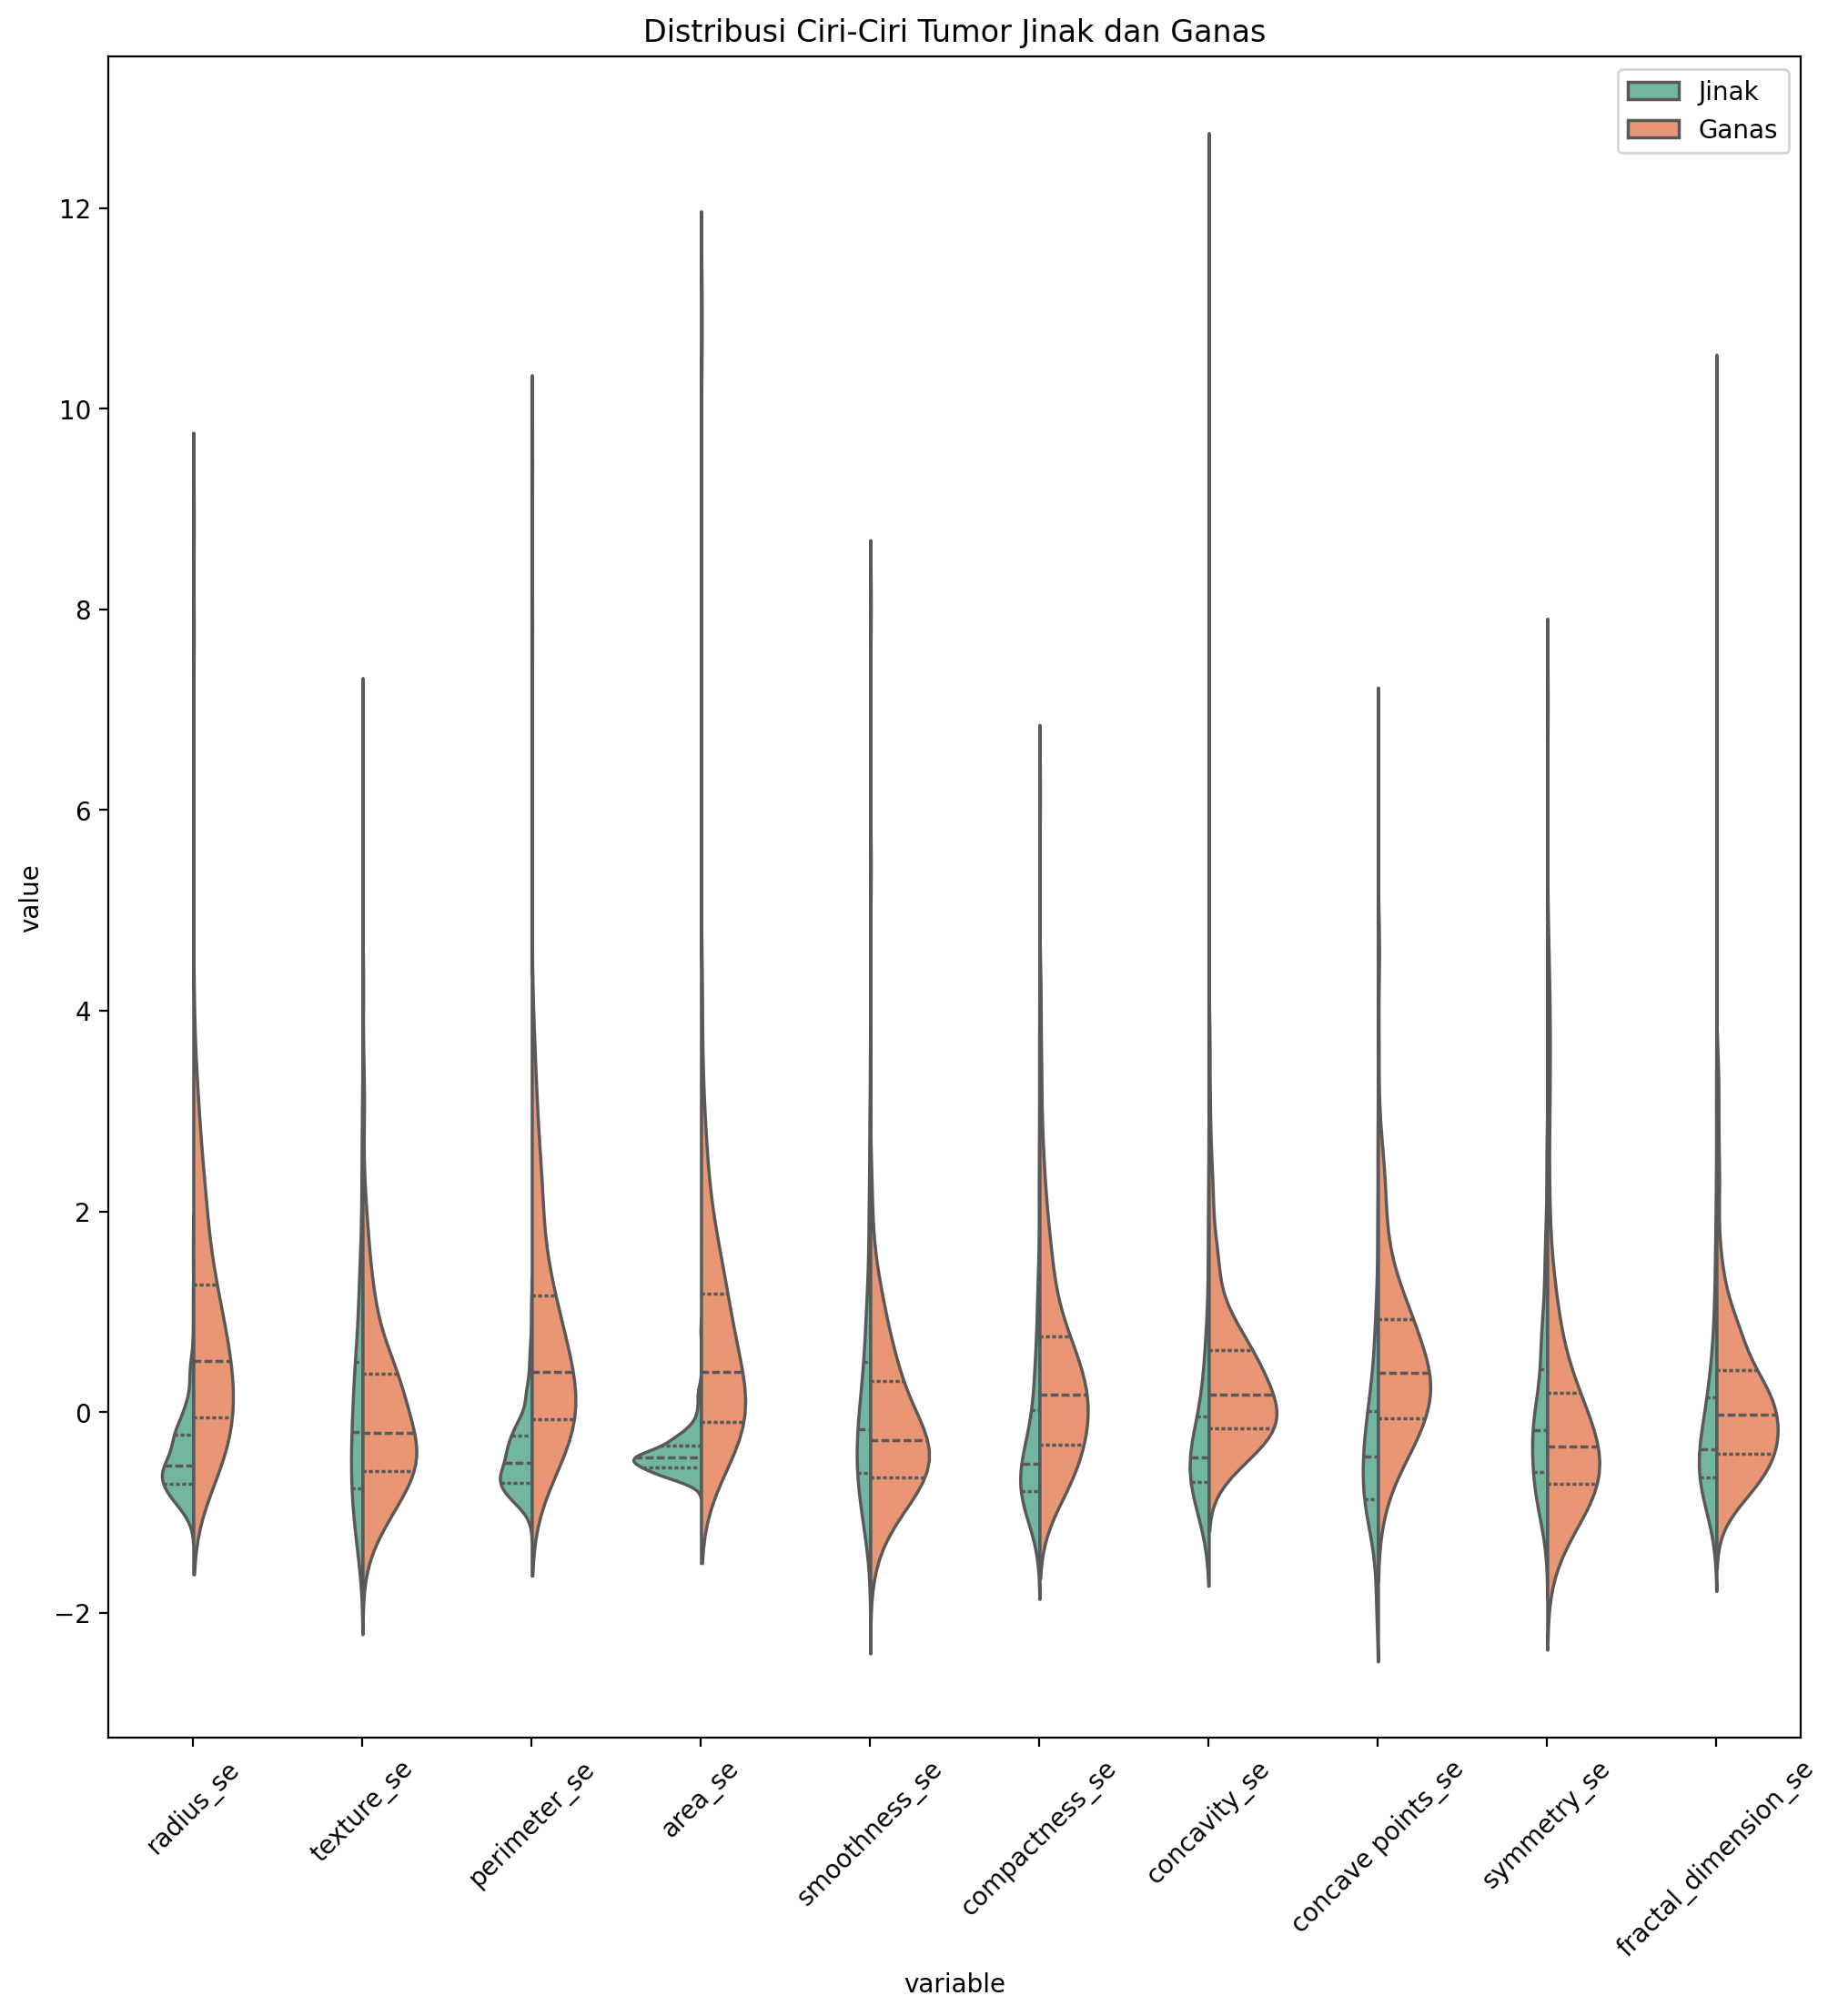

In [ ]:
plot_violinplot(data, se)

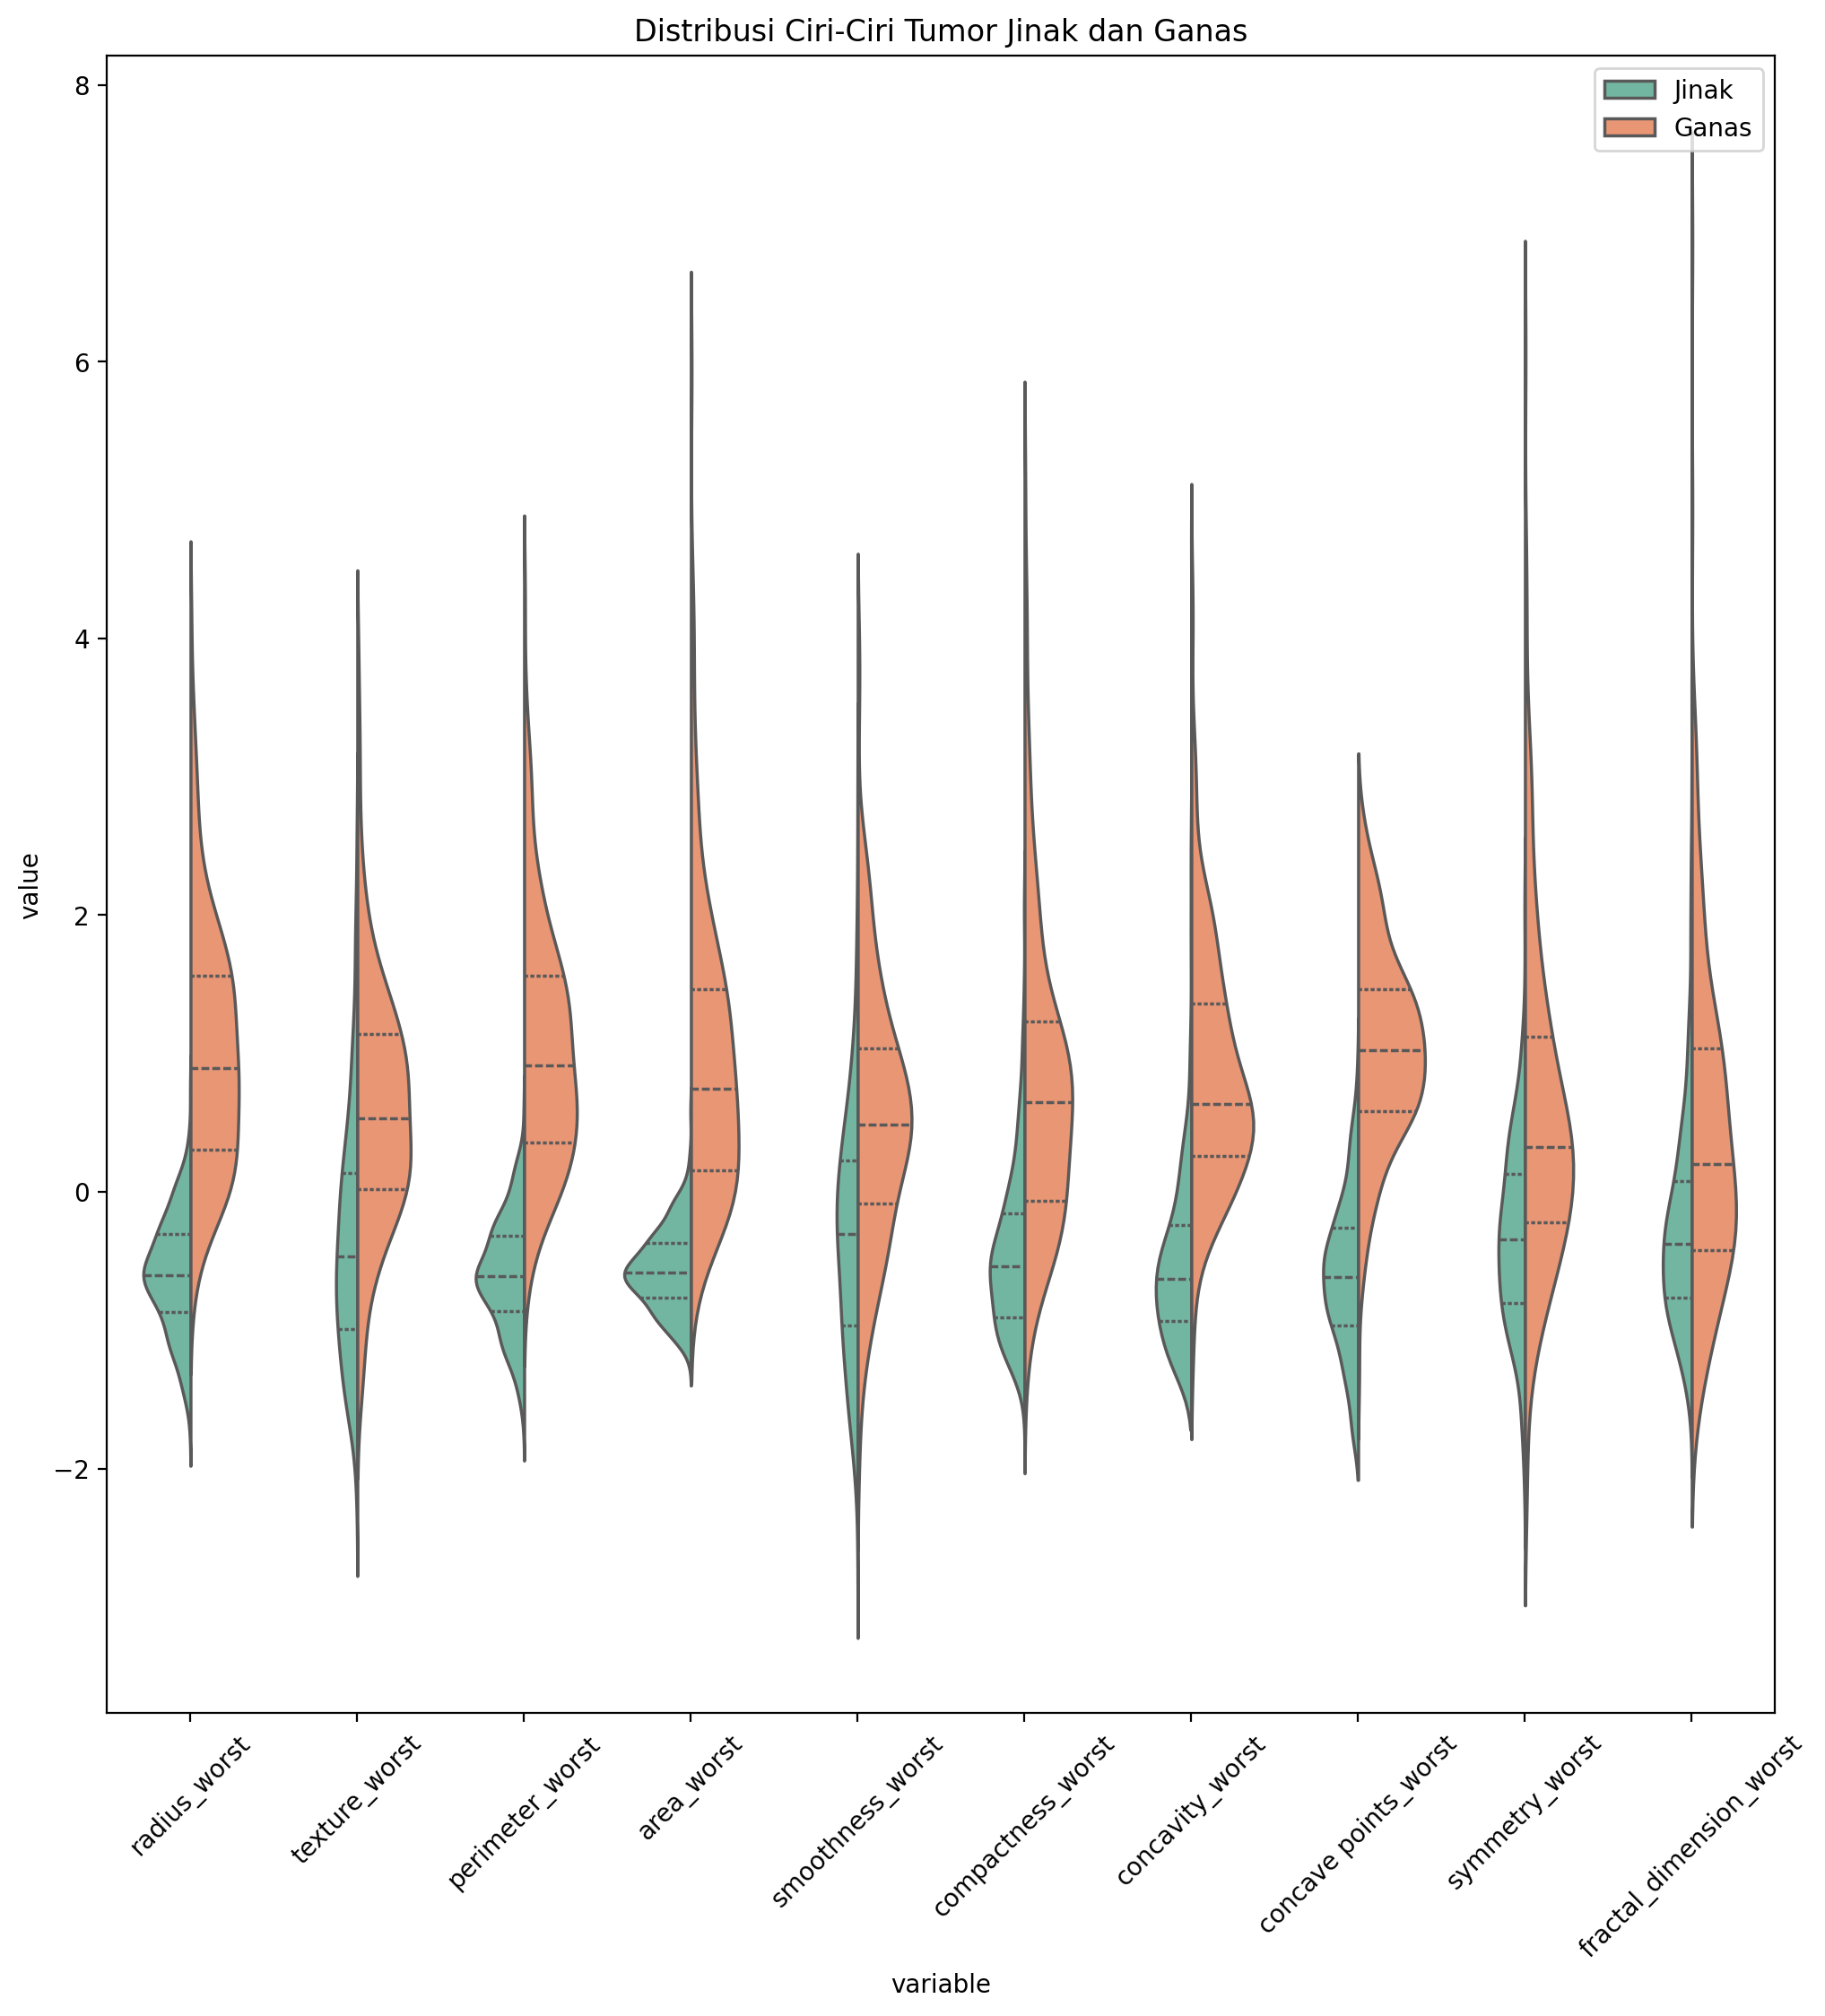

In [ ]:
plot_violinplot(data, worst)

In [ ]:
# Mengelompokkan data berdasarkan kolom diagnosis dan menghitung statistik deskriptif
numerical = data.drop('diagnosis',axis=1).columns
data.groupby(['diagnosis'])[numerical].agg([np.mean, np.std, np.min, np.max])

id                                radius_mean            \
                   mean           std   min        max        mean       std   
diagnosis                                                                      
0.0        2.654382e+07  1.167397e+08  8913  911320502   12.146524  1.780512   
1.0        3.681805e+07  1.378965e+08  8670  911296202   17.462830  3.203971   

                         texture_mean            ... concave points_worst  \
              min    max         mean       std  ...                  min   
diagnosis                                        ...                        
0.0         6.981  17.85    17.914762  3.995125  ...              0.00000   
1.0        10.950  28.11    21.604906  3.779470  ...              0.02899   

                 symmetry_worst                            \
             max           mean       std     min     max   
diagnosis                                                   
0.0        0.175       0.270246  0.041745  0.1566  0.4228   
1.0        0.291       0.323468  0.074685  0.1565  0.6638   

          fractal_dimension_worst                             
                             mean       std      min     max  
diagnosis                                                     
0.0                      0.079442  0.013804  0.05521  0.1486  
1.0                      0.091530  0.021553  0.05504  0.2075  

[2 rows x 124 columns]

In [ ]:
data

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302        1.0        17.99         10.38          122.80   
1      842517        1.0        20.57         17.77          132.90   
2    84300903        1.0        19.69         21.25          130.00   
3    84348301        1.0        11.42         20.38           77.58   
4    84358402        1.0        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424        1.0        21.56         22.39          142.00   
565    926682        1.0        20.13         28.25          131.20   
566    926954        1.0        16.60         28.08          108.30   
567    927241        1.0        20.60         29.33          140.10   
568     92751        0.0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [ ]:
data.diagnosis.value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

# Uji Statistik

## T-Test

In [ ]:
# Memastikan diagnosis adalah numerik
data['diagnosis'] = data['diagnosis'].astype(float)

# Memilih grup berdasarkan diagnosis
group_malignant = data[data['diagnosis'] == 1.0]['radius_mean']
group_benign = data[data['diagnosis'] == 0.0]['radius_mean']

# Memeriksa ukuran grup setelah perbaikan
print("Ukuran grup malignant:", len(group_malignant))
print("Ukuran grup benign:", len(group_benign))

# Melakukan uji T-test
t_statistic, p_value = ttest_ind(group_malignant, group_benign)

# Menampilkan hasil
print("T-statistic:", t_statistic)
print("p-value:", p_value)


Ukuran grup malignant: 212
Ukuran grup benign: 357
T-statistic: 25.435821610057054
p-value: 8.465940572262422e-96


T-statistic: 25.435821610057054 Nilai yang besar menunjukkan perbedaan yang lebih signifikan antara rata-rata dua kelompok.

p-value: 8.465940572262422e-96 (nilai p-value sangat kecil) menunjukkan bahwa perbedaan antara rata-rata dua kelompok sangat signifikan secara statistik. Secara konvensional, jika p-value < 0.05, kita menolak hipotesis nol dan menyimpulkan bahwa ada perbedaan yang signifikan antara dua kelompok.

## Chi Square

In [ ]:
# Menyiapkan tabel kontingensi antara diagnosis dan fitur kategorikal (misalnya, texture_mean)
contingency_table = pd.crosstab(data['diagnosis'], data['texture_mean'])

# Melakukan uji Chi-square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 498.4163033137783
p-value: 0.2505929829141982
Degrees of freedom: 478
Expected frequencies table:
[[0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  1.25483304 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  1.25483304 0.62741652 1.25483304 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741652
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 1.25483304
  0.62741652 0.62741652 0.62741652 0.62741652 0.62741652 0.62741

Chi-square statistic: 498.4163033137783 nilai statistik uji chi-square, yang mengukur seberapa besar perbedaan antara frekuensi yang diamati dan frekuensi yang diharapkan.

p-value: 0.2505929829141982 p-value menunjukkan probabilitas bahwa perbedaan antara frekuensi yang diamati dan frekuensi yang diharapkan terjadi secara kebetulan. p-value sebesar 0.2505929829141982 lebih besar dari ambang konvensional 0.05, sehingga kita gagal menolak hipotesis nol. Ini berarti tidak ada bukti yang cukup untuk menyatakan bahwa ada perbedaan yang signifikan antara frekuensi yang diamati dan yang diharapkan.

Degrees of freedom dalam uji chi-square dihitung berdasarkan jumlah kategori yang dibandingkan. degrees of freedom mempengaruhi distribusi chi-square yang digunakan untuk menghitung p-value.

## ANOVA

In [ ]:
from scipy import stats  # Import modul stats dari scipy

num_cols = list(data.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'diagnosis'

for i in num_cols:
    # Perform Kruskal-Wallis test
    grouped_data = [data[i][data[categorical_col] == category] for category in data[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Print the results with appropriate text color
    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: inf
p-value: 0.0
Reject the null hypothesis: There is a significant relationship between diagnosis and diagnosis

ANOVA statistic: 646.98
p-value: 8.46594057226382e-96
Reject the null hypothesis: There is a significant relationship between radius_mean and diagnosis

ANOVA statistic: 118.1
p-value: 4.0586360478986136e-25
Reject the null hypothesis: There is a significant relationship between texture_mean and diagnosis

ANOVA statistic: 697.24
p-value: 8.43625103617395e-101
Reject the null hypothesis: There is a significant relationship between perimeter_mean and diagnosis

ANOVA statistic: 573.06
p-value: 4.7345643103077244e-88
Reject the null hypothesis: There is a significant relationship between area_mean and diagnosis

ANOVA statistic: 83.65
p-value: 1.051850359203376e-18
Reject the null hypothesis: There is a significant relationship between smoothness_mean and diagnosis

ANOVA statistic: 313.23
p-value: 3.938263105887389e-56
Reject the null hypothesis: There is a 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


# Klasifikasi Tanpa PCA

In [ ]:
# creating features and label

X = data.drop('diagnosis', axis = 1)
y = data['diagnosis']

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.992462311557789
0.9590643274853801


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[105   3]
 [  4  59]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       108
         1.0       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Desicion Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Menentukan Parameter untuk Grid Searc
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'splitter': 'random'}

In [ ]:
# best score

grid_search_dt.best_score_

0.959873417721519

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9748743718592965
0.9415204678362573


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[103   5]
 [  5  58]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       108
         1.0       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Perbandingan Akurasi Model

In [ ]:
print(f'Accuracy of Decision Tree: {dtc_acc}')
print(f'Accuracy of Random Forest: {ran_clf_acc}')

if dtc_acc > ran_clf_acc:
    print('Decision Tree has higher accuracy.')
elif dtc_acc < ran_clf_acc:
    print('Random Forest has higher accuracy.')
else:
    print('Both models have the same accuracy.')

Accuracy of Decision Tree: 0.9415204678362573
Accuracy of Random Forest: 0.9590643274853801
Random Forest has higher accuracy.


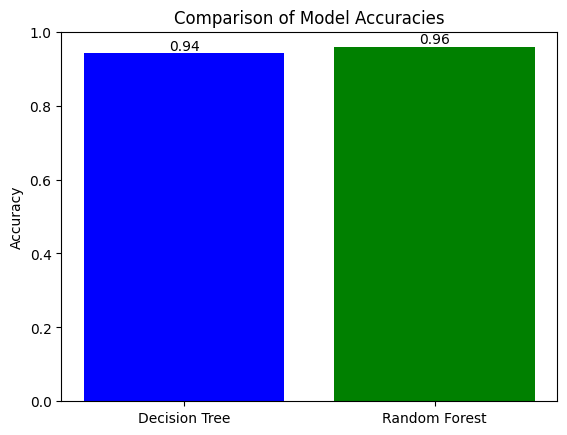

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Akurasi model
accuracies = [dtc_acc, ran_clf_acc]
model_names = ['Decision Tree', 'Random Forest']

# Membuat grafik batang
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color=['blue', 'green'])

# Menambahkan label akurasi di atas batang
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{accuracy:.2f}', ha='center', va='bottom')

# Menambahkan judul dan label sumbu
ax.set_title('Comparison of Model Accuracies')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)  # Mengatur rentang sumbu y dari 0 hingga 1

# Menampilkan grafik
plt.show()


# PCA

In [ ]:
warnings.filterwarnings('ignore')

df = pd.read_csv("data.csv", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)

Projecting 30-dimensional data to 2D


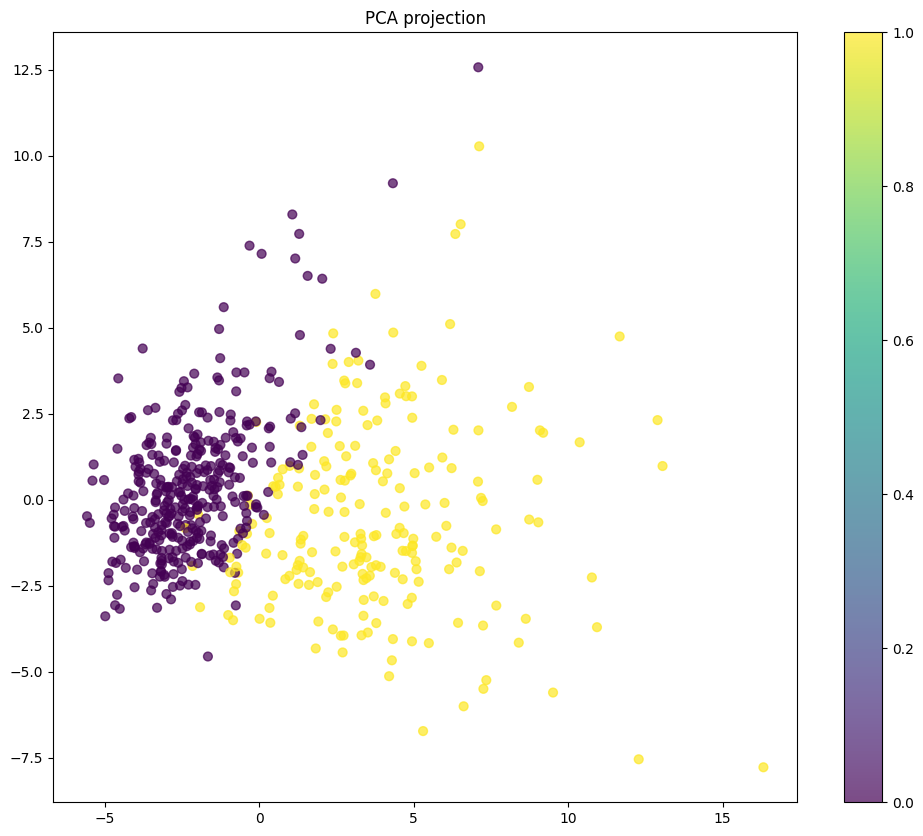

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisasi Fitur
X_scaled = StandardScaler().fit_transform(X)

# Melakukan reduksi dimensi dengan PCA
pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('PCA projection')
plt.style.use('seaborn-muted');

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.341s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.174175
[t-SNE] KL divergence after 2000 iterations: 0.852118


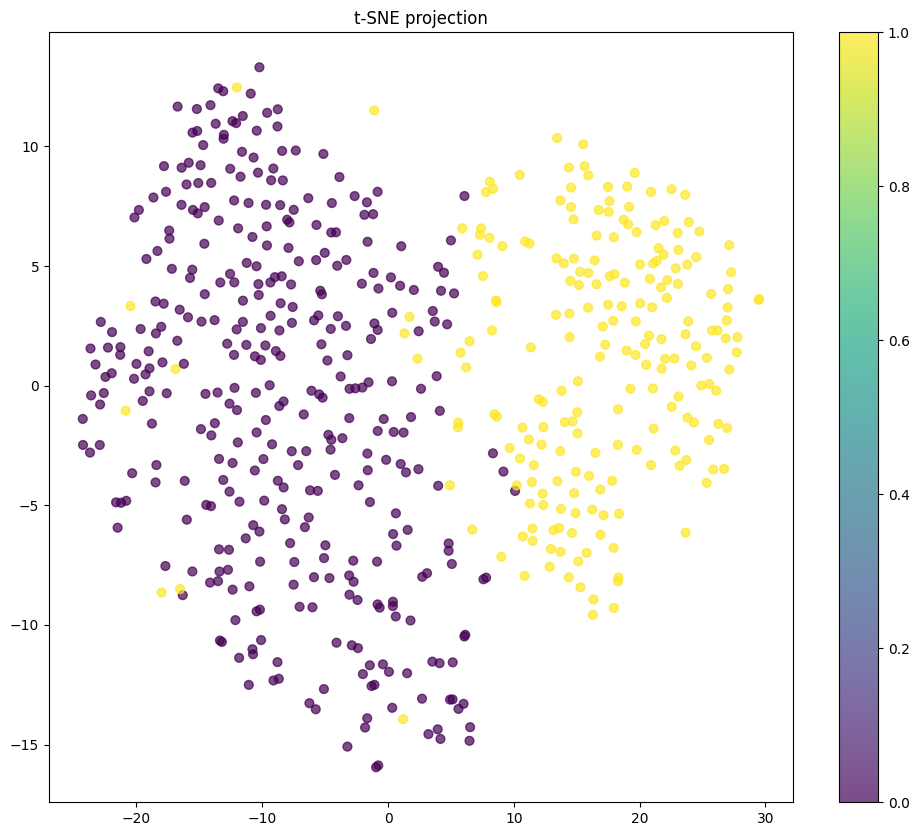

In [ ]:
# Invoke the TSNE method
from sklearn.manifold import TSNE

# menggunakan t-SNE untuk mereduksi dimensi data yang telah dinormalisasi
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df['diagnosis'],
            alpha=0.7, s=40)
plt.colorbar()
plt.title('t-SNE projection');

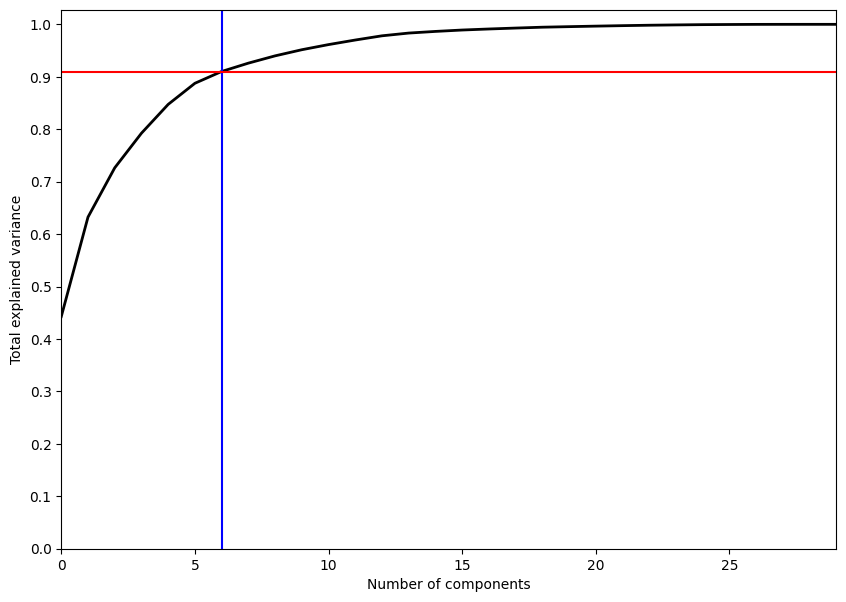

In [ ]:
# Menyesuaikan PCA dengan Data yang Dinormalisasi
pca = decomposition.PCA().fit(X_scaled)

# Membuat Grafik Akumulasi Rasio Varians yang Dijelaskan
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

In [ ]:
# Mengumpulkan semua kolom yang memiliki kata 'perimeter' dalam nama kolom masing-masing
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]

# Menghapus Kolom-kolom
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

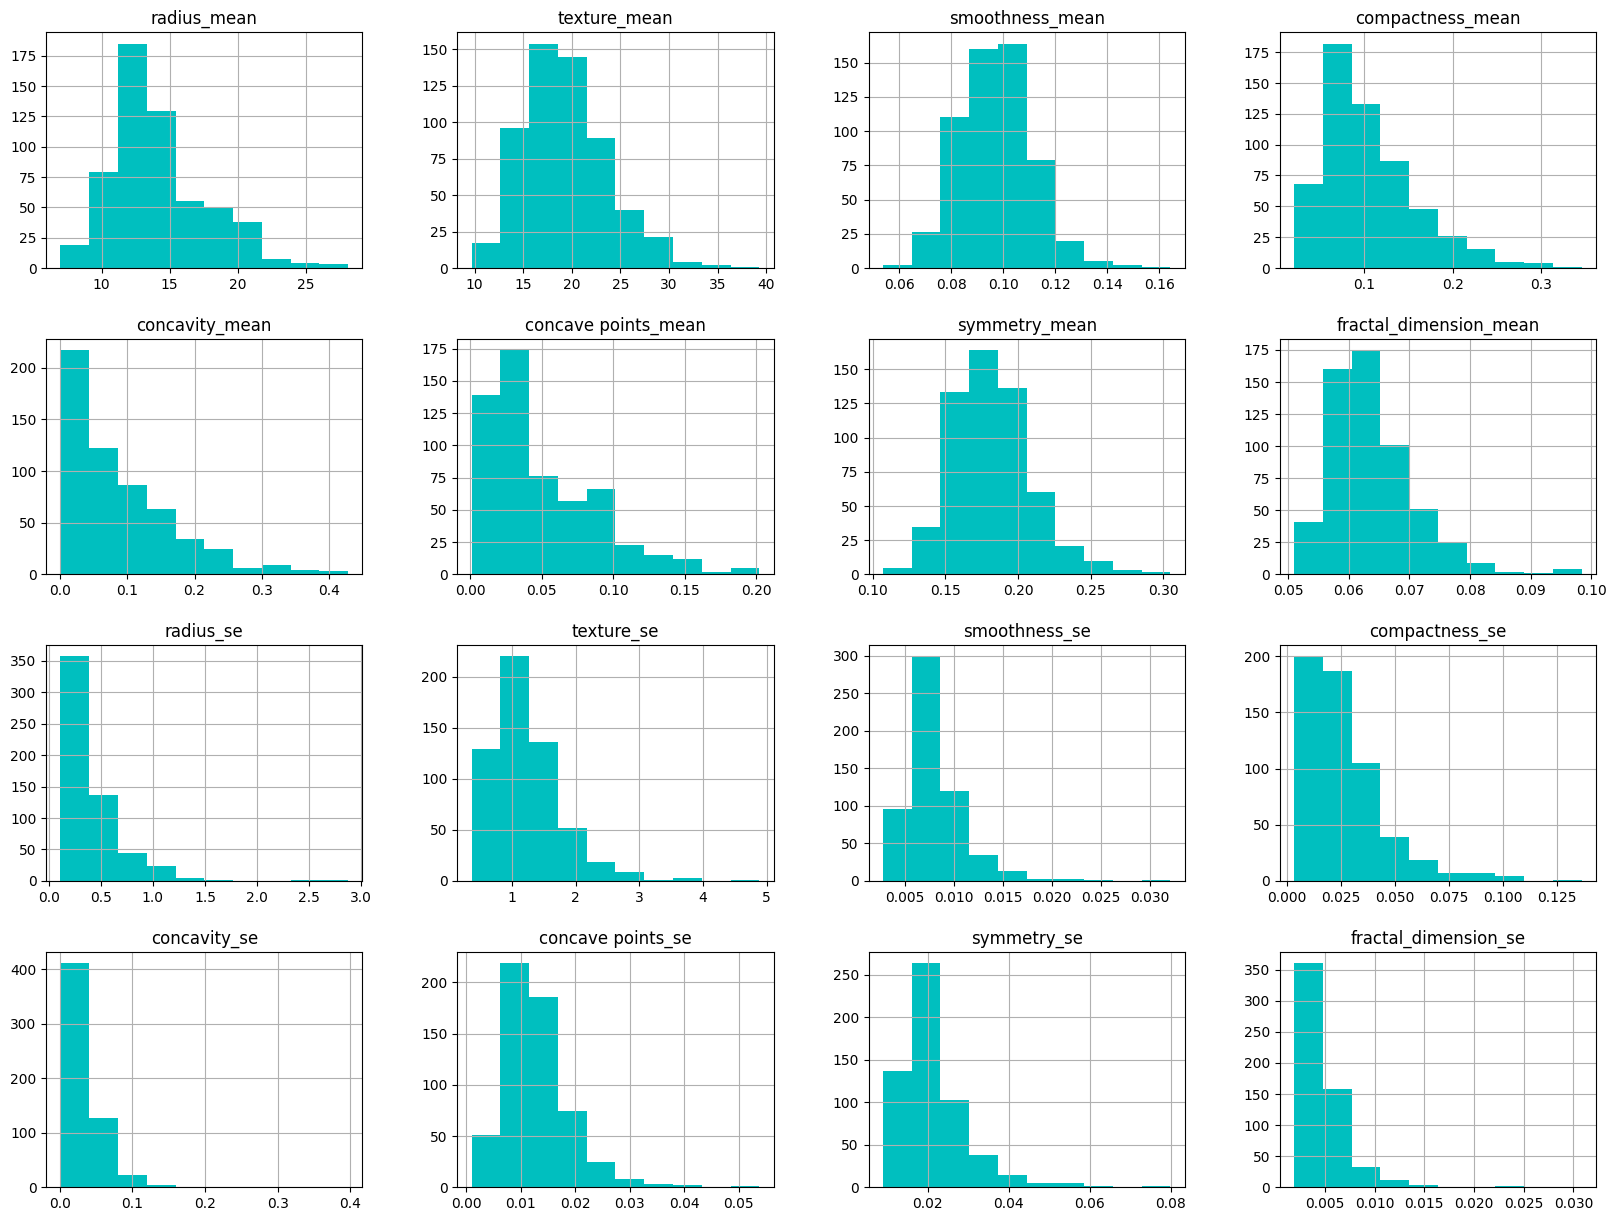

In [ ]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

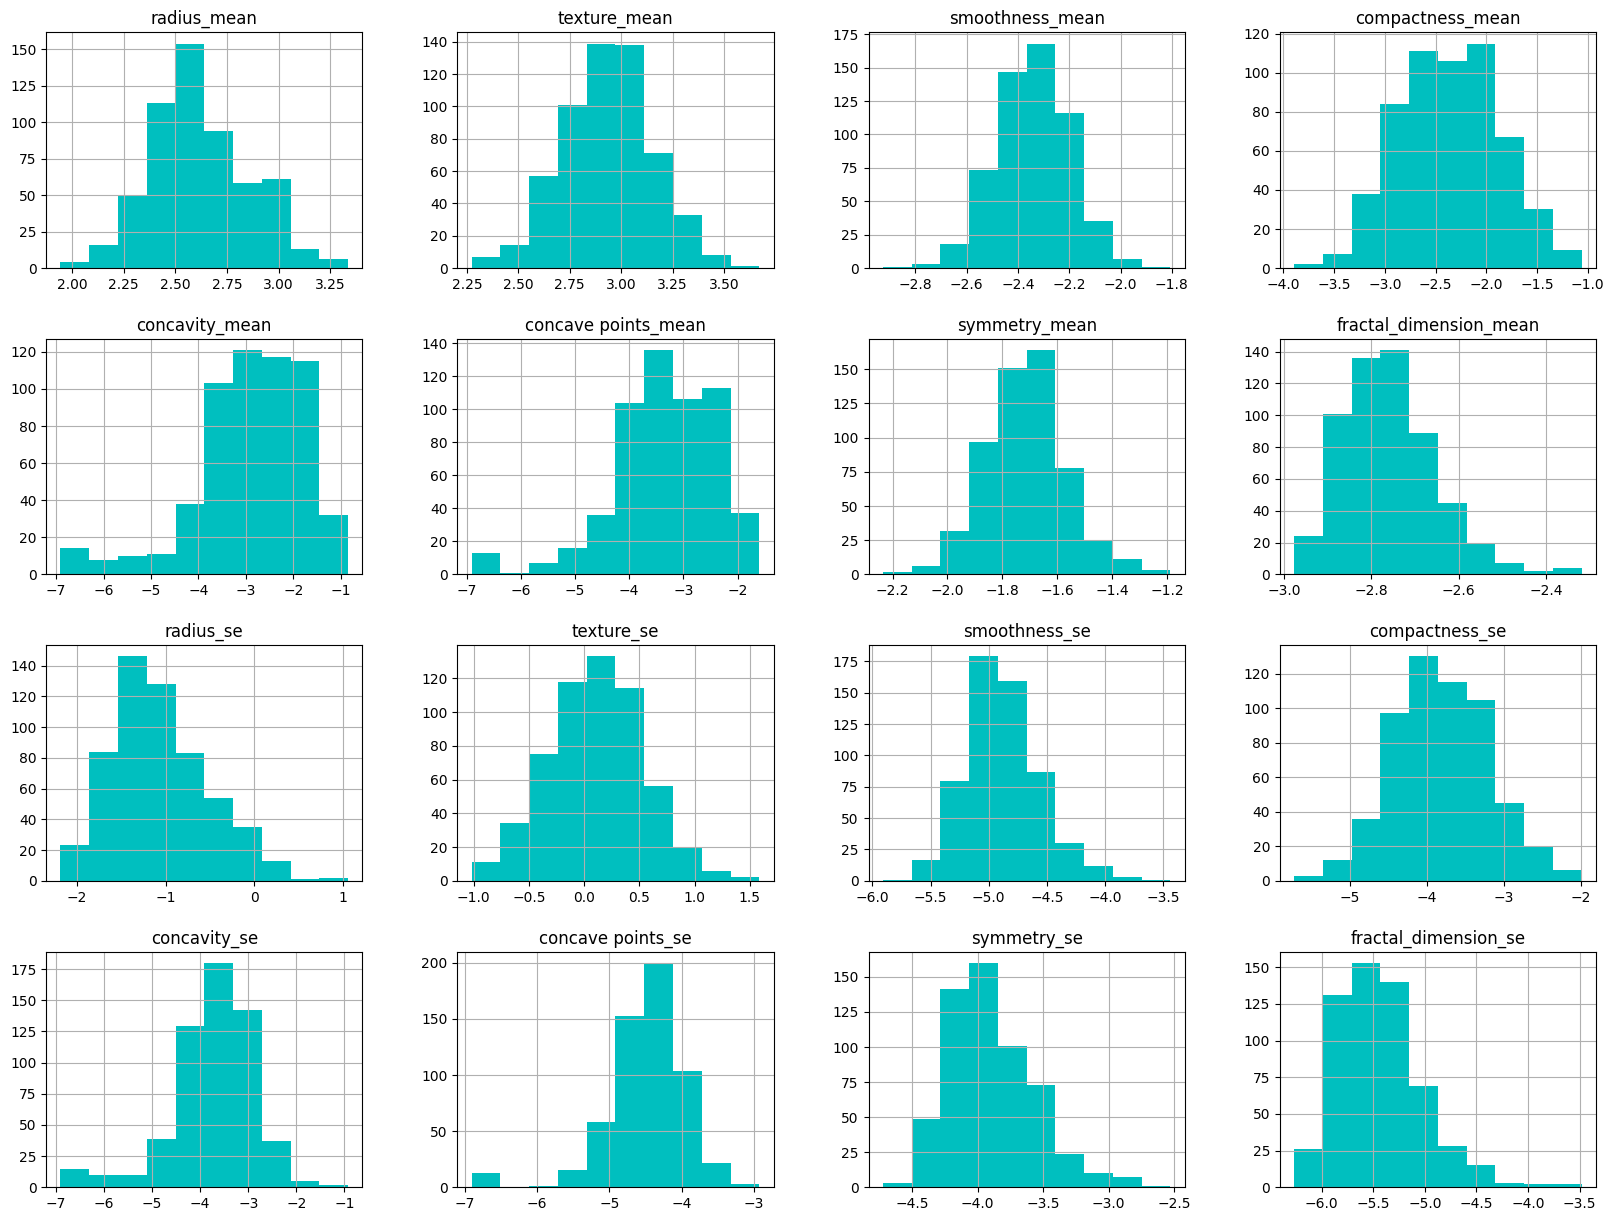

In [ ]:
#Log transformation
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

#Klasifikasi dengan PCA

In [ ]:
# creating features and label

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_fr = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_fr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_fr.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_fr.predict(X_train)))

rand_fr_acc = accuracy_score(y_test, y_pred)
print(rand_fr_acc)

1.0
0.9298245614035088


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[103   5]
 [  7  56]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       108
           1       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=28,
                                              min_samples_split=8,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best score

grid_search_dt.best_score_

0.939746835443038

In [ ]:
DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 28, min_samples_leaf = 1, min_samples_split = 8, splitter = 'random')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=8,
                       splitter='random')

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, dtc.predict(X_train)))

DTC_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)

0.9723618090452262
0.9415204678362573


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[101   7]
 [  8  55]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       108
           1       0.89      0.87      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [ ]:
print(f'Accuracy of Decision Tree: {DTC_acc}')
print(f'Accuracy of Random Forest: {rand_fr_acc}')

if DTC_acc > rand_fr_acc:
    print('Decision Tree has higher accuracy.')
elif DTC_acc < rand_fr_acc:
    print('Random Forest has higher accuracy.')
else:
    print('Both models have the same accuracy.')

Accuracy of Decision Tree: 0.9122807017543859
Accuracy of Random Forest: 0.9298245614035088
Random Forest has higher accuracy.
